## 1. Data collection and analysis
### 1.1 Importing Libraries and Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

# import and display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',  None)
data_listings =pd.read_csv('listings.csv')

## print the top 3 records
data_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20200317175912,2020-03-18,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Centrally located clean comfy furnished room ...,Centrally located in trendy Le Plateau. Join...,none,Although my place is centrally located in Le P...,I always inform my guests the places/attractio...,I am 6-8 mins. walk to Metro Laurie and bus ro...,You will have full access in the apartment. I...,I am always available to help and give informa...,No house rules but I expect my guests to follo...,NaN,NaN,https://a0.muscache.com/im/pictures/88170231/0...,NaN,2277,https://www.airbnb.com/users/show/2277,Nelia,2008-08-19,"Montreal, Québec, Canada","Honest, quiet and adhere to the golden rules a...",within an hour,100%,0%,f,https://a0.muscache.com/im/users/2277/profile_...,https://a0.muscache.com/im/users/2277/profile_...,Le Plateau,1.0,1.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Montreal, QC, Canada",Le Plateau-Mont-Royal,Le Plateau-Mont-Royal,NaN,Montreal,QC,H2J 3E9,Montreal,"Montreal, Canada",CA,Canada,45.53069,-73.58588,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",NaN,$39.00,$190.00,NaN,$0.00,$0.00,1,$6.00,2,7,2,2,7,7,2.0,7.0,2 weeks ago,t,0,0,0,76,2020-03-18,245,0,2011-09-06,2018-09-23,93.0,10.0,9.0,10.0,10.0,10.0,10.0,f,NaN,"{Quebec,"" CA""}",t,f,flexible,f,f,1,0,1,0,2.36
1,2843,https://www.airbnb.com/rooms/2843,20200317175912,2020-03-18,Fabulous downtown/airport room,Come stay in this trendy area of downtown Mont...,"Private individual room in the downtown area, ...",Come stay in this trendy area of downtown Mont...,none,This area of St Henri is actually downtown Mon...,From this room you can walk to downtown Montre...,There is a major metro/subway stop called Lion...,"The guests can use the kitchen anytime, fully ...",I meet guests when they arrive show them the h...,No smoking and no pets Airport bus stops acros...,NaN,NaN,https://a0.muscache.com/im/pictures/397204dc-4...,NaN,2319,https://www.airbnb.com/users/show/2319,Gail,2008-08-19,"Montreal, Québec, Canada",Manage a network of downtown rooms and private...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7c04e...,https://a0.muscac

In [3]:
# convert price type to float
data_listings['price'] = data_listings['price'].str.replace('$','')
data_listings['price'] = data_listings['price'].str.replace(',','')
data_listings['price'] = data_listings['price'].astype(float)

##### Split data betweeen test_set and train_set

In [4]:
# Print the shape of dataset with rows and columns
print('data set shape', data_listings.shape)

from sklearn.model_selection import train_test_split
train, test = train_test_split(data_listings, test_size = 0.2, random_state = 42)
print('train set shape', train.shape)
print('test set shape', test.shape)

data set shape (20176, 106)
train set shape (16140, 106)
test set shape (4036, 106)


### 1.2 Data analysis and cleaning

#### Missing Categorial features Values

In [5]:
## Here we will check the percentage of nan categorical values present in each feature

montreal_listing = pd.DataFrame()
montreal_listing = train.copy()

## 1 - step make the list of Categorial features wich has missing values 
features_with_NAN = [feature for feature in montreal_listing.columns if montreal_listing[feature].isnull().sum()>1 and montreal_listing[feature].dtypes=='O']
 
## 2 - step print the feature name and the percentage of missing values
for feature in features_with_NAN:
    print(feature, np.round(montreal_listing[feature].isnull().mean()*100, 4),'% missing values')       

name 0.0929 % missing values
summary 4.7336 % missing values
space 33.544 % missing values
description 2.8625 % missing values
neighborhood_overview 38.1413 % missing values
notes 64.1512 % missing values
transit 38.0731 % missing values
access 51.4994 % missing values
interaction 45.3965 % missing values
house_rules 44.1264 % missing values
host_name 0.0248 % missing values
host_since 0.0248 % missing values
host_location 0.1301 % missing values
host_about 45.0372 % missing values
host_response_time 40.0372 % missing values
host_response_rate 40.0372 % missing values
host_acceptance_rate 28.1413 % missing values
host_is_superhost 0.0248 % missing values
host_thumbnail_url 0.0248 % missing values
host_picture_url 0.0248 % missing values
host_neighbourhood 13.4263 % missing values
host_has_profile_pic 0.0248 % missing values
host_identity_verified 0.0248 % missing values
neighbourhood 0.2107 % missing values
city 0.0248 % missing values
state 0.4957 % missing values
zipcode 1.4746 % mis

In [6]:
## Replace missing value with a new label ('Missing')
def replace_cat_feature(dataset,features_with_NAN):
    data=montreal_listing.copy()
    data[features_with_NAN]=data[features_with_NAN].fillna('Missing')
    return data

montreal_listing=replace_cat_feature(montreal_listing,features_with_NAN)

montreal_listing[features_with_NAN].isnull().sum()

name                      0
summary                   0
space                     0
description               0
neighborhood_overview     0
notes                     0
transit                   0
access                    0
interaction               0
house_rules               0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
city                      0
state                     0
zipcode                   0
market                    0
weekly_price              0
monthly_price             0
security_deposit          0
cleaning_fee              0
first_review              0
last_review               0
jurisdiction_names        0
dtype: int64

In [7]:
montreal_listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
17188,38905522,https://www.airbnb.com/rooms/38905522,20200317175912,2020-03-17,Au bord de l’eau,Missing,Missing,Missing,none,Missing,Missing,Missing,Missing,Missing,Missing,NaN,NaN,https://a0.muscache.com/im/pictures/b819c456-2...,NaN,297959654,https://www.airbnb.com/users/show/297959654,Jean-René,2019-09-25,"Montreal, Quebec, Canada",Missing,within a day,100%,Missing,f,https://a0.muscache.com/im/pictures/user/70ccf...,https://a0.muscache.com/im/pictures/user/70ccf...,Missing,1.0,1.0,"['email', 'phone', 'offline_government_id', 's...",t,f,"Montréal, QC, Canada",L'Ile-Bizard,L'Île-Bizard-Sainte-Geneviève,NaN,Montréal,QC,H9C 1L5,Montreal,"Montréal, Canada",CA,Canada,45.48747,-73.87702,f,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",NaN,63.0,Missing,Missing,Missing,Missing,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,5 months ago,t,0,0,0,0,2020-03-17,0,0,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{Quebec,"" CA""}",t,f,flexible,f,f,1,0,1,0,NaN
9902,23857896,https://www.airbnb.com/rooms/23857896,20200317175912,2020-03-17,"Lovely, cozy & clean apartment in Rosemont","Lovely, cozy and clean apartment in Rosemont !...",Missing,"Lovely, cozy and clean apartment in Rosemont !...",none,Missing,Missing,Missing,Missing,Missing,Missing,NaN,NaN,https://a0.muscache.com/im/pictures/1445c7db-d...,NaN,42838352,https://www.airbnb.com/users/show/42838352,Caroline,2015-08-29,"Montreal, Quebec, Canada",Missing,Missing,Missing,Missing,f,https://a0.muscache.com/im/users/42838352/prof...,https://a0.muscache.com/im/users/42838352/prof...,La Petite-Patrie,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Montréal, Québec, Canada",Rosemont-La Petite-Patrie,Rosemont-La Petite-Patrie,NaN,Montréal,Québec,H2S 2E2,Montreal,"Montréal, Canada",CA,Canada,45.53846,-73.60068,t,Apartment,Entire home/apt,4,1.0,0.0,1.0,Real Bed,"{Wifi,Kitchen,Heating,Washer,Dryer,""Smoke dete...",NaN,52.0,Missing,Missing,Missing,Missing,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,24 months ago,t,0,0,0,0,2020-03-17,3,0,2018-04-01,2018-04-08,93.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,"{Quebec,"" CA""}",t,f,flexible,f,f,1,1,0,0,0.13


#### Missing numerical features Values

In [8]:
## Here we will check the percentage of nan numerical values present in each feature

montreal_listing = pd.DataFrame()
montreal_listing = train.copy()

## 1 - step make the list of Categorial features wich has missing values 
features_numerical_with_NAN = [feature for feature in montreal_listing.columns if montreal_listing[feature].isnull().sum()>1 and montreal_listing[feature].dtypes !='O']
 
## 2 - step print the feature name and the percentage of missing values
for feature in features_numerical_with_NAN:
    print(feature, np.round(montreal_listing[feature].isnull().mean()*100, 4),'% missing values')       

thumbnail_url 100.0 % missing values
medium_url 100.0 % missing values
xl_picture_url 100.0 % missing values
host_listings_count 0.0248 % missing values
host_total_listings_count 0.0248 % missing values
neighbourhood_group_cleansed 100.0 % missing values
bathrooms 0.1239 % missing values
bedrooms 0.1673 % missing values
beds 0.7373 % missing values
square_feet 98.8476 % missing values
review_scores_rating 22.2429 % missing values
review_scores_accuracy 22.3296 % missing values
review_scores_cleanliness 22.3234 % missing values
review_scores_checkin 22.3544 % missing values
review_scores_communication 22.3048 % missing values
review_scores_location 22.3606 % missing values
review_scores_value 22.3854 % missing values
license 100.0 % missing values
reviews_per_month 20.285 % missing values


In [9]:
## Replacing the numerical Missing Values
dataset = montreal_listing.copy()
for feature in features_numerical_with_NAN:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[features_numerical_with_NAN].isnull().sum()

thumbnail_url                   16140
medium_url                      16140
xl_picture_url                  16140
host_listings_count                 0
host_total_listings_count           0
neighbourhood_group_cleansed    16140
bathrooms                           0
bedrooms                            0
beds                                0
square_feet                         0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_scores_communication         0
review_scores_location              0
review_scores_value                 0
license                         16140
reviews_per_month                   0
dtype: int64

In [10]:
dataset.shape

(16140, 125)

#### Not interesting features

In [11]:
### drop 100% features_numerical_with_NAN nan values 
dataset.drop(['thumbnail_url','medium_url','xl_picture_url','neighbourhood_group_cleansed','license'],axis=1,inplace=True)

## drop host_since
dataset.drop(['host_since'],axis=1,inplace=True)

## drop Not interesting features
dataset.drop(['id','listing_url','scrape_id','last_scraped', 'picture_url', 'host_url', 'host_name','host_thumbnail_url','host_picture_url','state', 'calendar_last_scraped','first_review', 'last_review'],axis=1,inplace=True)

In [12]:
dataset.shape

(16140, 106)

## Create CSV file For Dashbord

In [13]:
selected_feat =['neighbourhood', 'city', 'country', 'longitude', 'latitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type',
      'availability_365', 'instant_bookable', 
        'host_is_superhost', 'number_of_reviews', 'review_scores_rating', 'price']
dataset_Dash=dataset[selected_feat]
export_csv = dataset_Dash.to_csv (r'/home/bilal/IA/IA_Airbnb_Vue_Dashboard/df_Dashbord.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

#### Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observation and convert to a new label 'Rare_var'

In [14]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

for feature in categorical_features:
    temp=dataset.groupby(feature)['price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    
dataset.head(4)    

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,thumbnail_urlnan,medium_urlnan,xl_picture_urlnan,host_listings_countnan,host_total_listings_countnan,neighbourhood_group_cleansednan,bathroomsnan,bedroomsnan,bedsnan,square_feetnan,review_scores_ratingnan,review_scores_accuracynan,review_scores_cleanlinessnan,review_scores_checkinnan,review_scores_communicationnan,review_scores_locationnan,review_scores_valuenan,licensenan,reviews_per_monthnan
17188,Rare_var,Rare_var,Rare_var,Rare_var,none,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,297959654,"Montreal, Quebec, Canada",Rare_var,within a day,100%,Rare_var,f,Rare_var,1.0,1.0,"['email', 'phone', 'offline_government_id', 's...",t,f,"Montréal, QC, Canada",Rare_var,Rare_var,Montréal,Rare_var,Montreal,"Montréal, Canada",CA,Canada,45.48747,-73.87702,f,Rare_var,Private room,2,1.0,1.0,1.0,Real Bed,Rare_var,207.5,63.0,Rare_var,Rare_var,Rare_var,Rare_var,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,5 months ago,t,0,0,0,0,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{Quebec,"" CA""}",t,f,flexible,f,f,1,0,1,0,0.63,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1
9902,Rare_var,Rare_var,Rare_var,Rare_var,none,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,42838352,"Montreal, Quebec, Canada",Rare_var,Rare_var,Rare_var,Rare_var,f,La Petite-Patrie,1.0,1.0,Rare_var,t,t,"Montréal, Québec, Canada",Rosemont-La Petite-Patrie,Rosemont-La Petite-Patrie,Montréal,Rare_var,Montreal,"Montréal, Canada",CA,Canada,45.53846,-73.60068,t,Apartment,Entire home/apt,4,1.0,0.0,1.0,Real Bed,Rare_var,207.5,52.0,Rare_var,Rare_var,Rare_var,Rare_var,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,Rare_var,t,0,0,0,0,3,0,93.0,10.0,9.0,10.0,10.0,9.0,9.0,f,"{Quebec,"" CA""}",t,f,flexible,f,f,1,1,0,0,0.13,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
17796,Rare_var,Rare_var,Rare_var,Rare_var,none,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,305316366,CA,Rare_var,within an hour,Rare_var,100%,f,Quartier des Spectacles,13.0,13.0,"['email', 'phone', 'offline_government_id', 's...",t,t,"Montréal, Québec, Canada",Notre-Dame-de-Grace,Côte-des-Neiges-Notre-Dame-de-Grâce,Montréal,Rare_var,Montreal,"Montréal, Canada",CA,Canada,45.46066,-73.64763,t,House,Entire home/apt,4,1.5,2.0,2.0,Real Bed,Rare_var,207.5,118.0,Rare_var,Rare_var,$0.00,Rare_var,4,$0.00,1,30,1,2,30,30,1.8,30.0,2 weeks ago,t,30,60,90,364,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{Quebec,"" CA""}",t,f,moderate,f,f,8,8,0,0,0.63,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1
16947,Rare_var,Rare_var,Rare_var,Rare_var,none,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,Rare_var,14693

In [15]:
dataset.bed_type.value_counts()

Real Bed    15970
Rare_var      170
Name: bed_type, dtype: int64

### Handele categorical Features

In [16]:
# Encoding categorical features 
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)
    
dataset.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,thumbnail_urlnan,medium_urlnan,xl_picture_urlnan,host_listings_countnan,host_total_listings_countnan,neighbourhood_group_cleansednan,bathroomsnan,bedroomsnan,bedsnan,square_feetnan,review_scores_ratingnan,review_scores_accuracynan,review_scores_cleanlinessnan,review_scores_checkinnan,review_scores_communicationnan,review_scores_locationnan,review_scores_valuenan,licensenan,reviews_per_monthnan
17188,0,0,0,0,0,0,0,0,0,0,0,297959654,1,0,2,2,2,1,17,1.0,1.0,11,1,2,2,19,9,0,0,1,0,1,1,45.48747,-73.87702,0,3,0,2,1.0,1.0,1.0,1,0,207.5,63.0,0,0,4,15,1,4,1,1125,1,1,1125,1125,1.0,1125.0,7,0,0,0,0,0,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,1,0,0,1,0,1,0,0.63,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1
9902,0,0,0,0,0,0,0,0,0,0,0,42838352,1,0,0,0,2,1,14,1.0,1.0,6,1,1,1,9,6,0,0,1,0,1,1,45.53846,-73.60068,1,0,2,4,1.0,0.0,1.0,1,0,207.5,52.0,0,0,4,15,1,4,1,1125,1,1,1125,1125,1.0,1125.0,1,0,0,0,0,0,3,0,93.0,10.0,9.0,10.0,10.0,9.0,9.0,1,0,0,0,1,0,0,1,1,0,0,0.13,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
17796,0,0,0,0,0,0,0,0,0,0,0,305316366,3,0,3,0,4,1,19,13.0,13.0,11,1,1,1,20,5,0,0,1,0,1,1,45.46066,-73.64763,1,2,2,4,1.5,2.0,2.0,1,0,207.5,118.0,0,0,1,15,4,4,1,30,1,2,30,30,1.8,30.0,9,0,30,60,90,364,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,8,8,0,0,0.63,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1
16947,0,0,0,0,0,0,0,0,0,0,0,146937818,1,0,3,2,4,2,17,1.0,1.0,11,1,2,2,19,9,0,0,0,0,1,1,45.65518,-73.57457,1,0,0,2,1.5,1.0,1.0,1,0,207.5,75.0,0,0,4,15,1,4,2,1125,2,2,1125,1125,2.0,1125.0,5,0,30,60,90,180,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,1,0,0,2,1,1,0,0.63,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1
18192,0,0,0,0,0,0,0,0,0,0,0,311505714,3,0,3,2,4,1,0,14.0,14.0,21,1,2,2,11,8,0,0,1,0,1,1,45.45209,-73.59023,1,2,0,1,2.0,1.0,2.0,1,0,207.5,25.0,0,0,4,12,1,4,32,124,32,32,124,124,32.0,124.0,15,0,12,25,38,38,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,14,0,14,0,0.63,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1


### Selection of features

In [17]:
selected_feat =['neighbourhood', 
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type',
      'extra_people', 'availability_365', 'instant_bookable', 
        'host_is_superhost', 'number_of_reviews', 'review_scores_rating', 'price']
dataset=dataset[selected_feat]
dataset.head(4)

,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,bed_type,extra_people,availability_365,instant_bookable,host_is_superhost,number_of_reviews,review_scores_rating,price
17188,19,3,0,2,1.0,1.0,1,4,0,0,1,0,96.0,63.0
9902,9,0,2,4,0.0,1.0,1,4,0,0,1,3,93.0,52.0
17796,20,2,2,4,2.0,2.0,1,4,364,0,1,0,96.0,118.0
16947,19,0,0,2,1.0,1.0,1,4,180,0,2,0,96.0,75.0


### Features Scaling

Because we have different units of measure and different magnitude in each feature, that's why, it's important to use scaling, in order to help more the regression ML algorithm to be more efficient

In [18]:
# Normalise Dataframe 
feature_scale=[feature for feature in dataset.columns if feature not in ['price']]
data = pd.DataFrame()
for feature in feature_scale:
    data[feature] = (dataset[feature] - dataset[feature].mean())/ (dataset[feature].std())

data.insert(loc=1, column='price', value=dataset['price'])
dataset = data.copy()
dataset.head()

,neighbourhood,price,property_type,room_type,accommodates,bedrooms,beds,bed_type,extra_people,availability_365,instant_bookable,host_is_superhost,number_of_reviews,review_scores_rating
17188,0.780457,63.0,1.718538,-1.586789,-0.629797,-0.392041,-0.545363,0.103171,-0.10214,-0.828289,-1.104263,-0.480543,-0.500030,0.241164
9902,-0.829453,52.0,-0.492949,0.640235,0.188997,-1.349452,-0.545363,0.103171,-0.10214,-0.828289,-1.104263,-0.480543,-0.435664,-0.134827
17796,0.941448,118.0,0.981376,0.640235,0.188997,0.565371,0.107181,0.103171,-0.10214,2.096689,-1.104263,-0.480543,-0.500030,0.241164
16947,0.780457,75.0,-0.492949,-1.586789,-0.629797,-0.392041,-0.545363,0.103171,-0.10214,0.618129,-1.104263,2.074120,-0.500030,0.241164
18192,-0.507471,25.0,0.981376,-1.586789,-1.039194,-0.392041,0.107181,0.103171,-0.10214,-0.522934,-1.104263,-0.480543,-0.500030,0.241164


In [19]:
x_train = dataset[feature_scale]
y_train = np.log10(dataset['price'].values)

# Test set Feature engineering

In [20]:
dataset_test = pd.DataFrame()
dataset_test = test.copy()

# 1 - step make the list of Categorial features wich has missing values 
features_with_NAN = [feature for feature in dataset_test.columns if dataset_test[feature].isnull().sum()>1 and dataset_test[feature].dtypes=='O']


## Replace missing value with a new label ('Missing')
def replace_cat_feature(dataset_test,features_with_NAN):
    data=dataset_test.copy()
    data[features_with_NAN]=data[features_with_NAN].fillna('Missing')
    return data

datset_test=replace_cat_feature(dataset_test,features_with_NAN)

## 2 - step make the list of Categorial features wich has missing values 
features_numerical_with_NAN = [feature for feature in montreal_listing.columns if montreal_listing[feature].isnull().sum()>1 and montreal_listing[feature].dtypes !='O']
 
## Replacing the numerical Missing Values
for feature in features_numerical_with_NAN:
    ## We will replace by using median since there are outliers
    median_value=dataset_test[feature].median()
    
    ## create a new feature to capture nan values
    dataset_test[feature+'nan']=np.where(datset_test[feature].isnull(),1,0)
    dataset_test[feature].fillna(median_value,inplace=True)    
    

## Not interesting features
## drop 100% features_numerical_with_NAN nan values 
datset_test.drop(['thumbnail_url','medium_url','xl_picture_url','neighbourhood_group_cleansed','license'],axis=1,inplace=True)

## drop host_since
datset_test.drop(['host_since'],axis=1,inplace=True)

## drop Not interesting features
datset_test.drop(['id','listing_url','scrape_id','last_scraped', 'picture_url', 'host_url', 'host_name','host_thumbnail_url','host_picture_url','state', 'calendar_last_scraped','first_review', 'last_review'],axis=1,inplace=True)  

## Handling Rare Categorical Feature

categorical_features=[feature for feature in dataset_test.columns if dataset_test[feature].dtype=='O']

for feature in categorical_features:
    temp=dataset_test.groupby(feature)['price'].count()/len(dataset_test)
    temp_df=temp[temp>0.01].index
    dataset_test[feature]=np.where(dataset_test[feature].isin(temp_df),dataset_test[feature],'Rare_var')

## Handele categorical Features   

for feature in categorical_features:
    labels_ordered=dataset_test.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset_test[feature]=dataset_test[feature].map(labels_ordered)
    
## Selection of features

selected_feat =['neighbourhood', 
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type',
      'extra_people', 'availability_365', 'instant_bookable', 
        'host_is_superhost', 'number_of_reviews', 'review_scores_rating', 'price']

dataset_test=dataset_test[selected_feat]

## Features Scaling
# Normalise Dataframe 
feature_scale=[feature for feature in dataset_test.columns if feature not in ['price']]
data = pd.DataFrame()
for feature in feature_scale:
    data[feature] = (dataset_test[feature] - dataset_test[feature].mean())/ (dataset_test[feature].std())

data.insert(loc=1, column='price', value=dataset_test['price'])
dataset_test = data.copy()

x_test = dataset_test[feature_scale]
y_test = dataset_test['price'].values

### Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * # import all metrics

#Prepare a Linear Regression (LR) Model and Fitting model with trainig data
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

#y_test = np.round(10 ** y_test, 0)
y_pred = np.round(10 ** y_pred, 0)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,96.0,144.0
1,80.0,150.0
2,281.0,202.0
3,75.0,58.0
4,61.0,61.0


In [22]:
print('Results of the evaluation of our LR model with different Measures:')
print('R2 (score):',round(r2_score(y_test, y_pred),2))
print('MAE:', round(mean_absolute_error(y_test, y_pred),2))
print('MSE:', round(mean_squared_error(y_test, y_pred),2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print('Median ABS Error:', round(median_absolute_error(y_test, y_pred),2))

Results of the evaluation of our LR model with different Measures:
R2 (score): 0.29
MAE: 48.48
MSE: 21632.8
RMSE: 147.08
Median ABS Error: 21.0


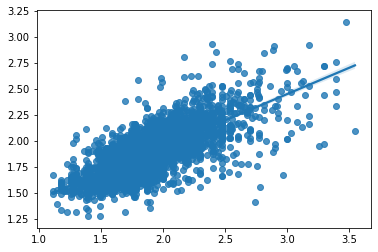

In [23]:
sns.regplot(x=np.log10(y_test),y=np.log10(y_pred),fit_reg=True)

## Linear, Ridge and Lasso Regression implementation (Cross Val score)

In [24]:
## concat data test and data train 
data_frames = [dataset, dataset_test]

data = pd.DataFrame()
data = pd.concat(data_frames)

#data = data[data['price']<400]
selected_depend =['neighbourhood', 
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type',
      'extra_people', 'availability_365', 'instant_bookable', 
        'host_is_superhost', 'number_of_reviews', 'review_scores_rating']
X=data[selected_depend] ## independent features
y=data['price'] ## dependent features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 1) Linear Regression

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)

mean_mse=np.mean(mse)
print('Mean of MSE:', round(mean_mse,2))

Mean of MSE: -43831.03


In [26]:
print('MSE values when cv=5', round(pd.DataFrame(mse),2))

MSE values when cv=5           0
0 -37197.10
1 -14969.50
2 -98909.13
3 -45344.08
4 -22735.35


Note: in certain data test the model is less performance, cause of the gaps between the difference price of apartment and home ( exp 30 $ 3000). So this unbalanced dataset affect the Accuracy results

In [27]:
lin_regressor.fit(X_train,y_train)
y_pred=lin_regressor.predict(X_test)
print('Results of the evaluation of our LR model with different Measures:')
print('MAE:', round(mean_absolute_error(y_test, y_pred),2))
print('MSE:', round(mean_squared_error(y_test, y_pred),2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print('Median ABS Error:', round(median_absolute_error(y_test, y_pred),2))

Results of the evaluation of our LR model with different Measures:
MAE: 60.22
MSE: 21062.96
RMSE: 145.13
Median ABS Error: 33.67


#### 2) Ridge Regression 

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [29]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-43823.192807432395


In [30]:
ridge_regressor.fit(X_train,y_train)
y_pred=ridge_regressor.predict(X_test)
print('Results of the evaluation of our LR model with different Measures:')
print('MAE:', round(mean_absolute_error(y_test, y_pred),2))
print('MSE:', round(mean_squared_error(y_test, y_pred),2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print('Median ABS Error:', round(median_absolute_error(y_test, y_pred),2))

Results of the evaluation of our LR model with different Measures:
MAE: 60.16
MSE: 21065.35
RMSE: 145.14
Median ABS Error: 33.74


#### 3) Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-43831.03044685337


In [32]:
lasso_regressor.fit(X_train,y_train)
y_pred=lasso_regressor.predict(X_test)
print('Results of the evaluation of our LR model with different Measures:')
print('MAE:', round(mean_absolute_error(y_test, y_pred),2))
print('MSE:', round(mean_squared_error(y_test, y_pred),2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print('Median ABS Error:', round(median_absolute_error(y_test, y_pred),2))

Results of the evaluation of our LR model with different Measures:
MAE: 60.22
MSE: 21062.96
RMSE: 145.13
Median ABS Error: 33.67


The new code start from the title :
Linear, Ridge and Lasso Regression implementation (Cross Val score)